## Calculating RMSD with pytraj

#### Load python modules

In [1]:
import pytraj as pt
import numpy as np
from matplotlib import pyplot as plt

#### Change directory to the location of the trajectory file.

In [2]:
%cd ~/workshop_pytraj/example_02

/home/user090/workshop_pytraj/example_02


#### Load trajectory

In [3]:
traj=pt.iterload('mdcrd_nowat.xtc', top='prmtop_nowat.parm7') 

- You can use a single filename, a list of filenames or a pattern. 
- The *ptraj.iterload* method returns a frame iterator object. This means that it registers what trajectories will be processed without actually loading them into memory. One frame will be loaded at a time when needed at the time of processing. This saves memory and allows for anaysis of large trajectories. 
- The *ptraj.load* method returns a trajectory object. In this case all trajectory frames are loaded into memory.

[*ptraj.iterload* manual](https://amber-md.github.io/pytraj/latest/_api/pytraj.io.html#pytraj.io.iterload)

#### Load reference frame

In [4]:
ref_coor = pt.load('inpcrd_nowat.pdb')

- Use the initial coordinates as the reference
- You can also use any trajectory frame, for example traj[0] as a reference structure.  

#### Take care of the molecules that moved out of the initial box

In [5]:
traj=traj.autoimage()

- The *autoimage* function will automatically center and image molecules/residues/atoms that are outside of the box back into the initial box.

#### Define the time axis for the RMSD plot 

In [6]:
time=np.linspace(0,1.999,3140)

- The trajectory was saved every 0.001 ns, and we have 2000 frames.

#### Compute and plot RMSD of the protein backbone atoms

Text(0, 0.5, 'RMSD, $ \\AA $')

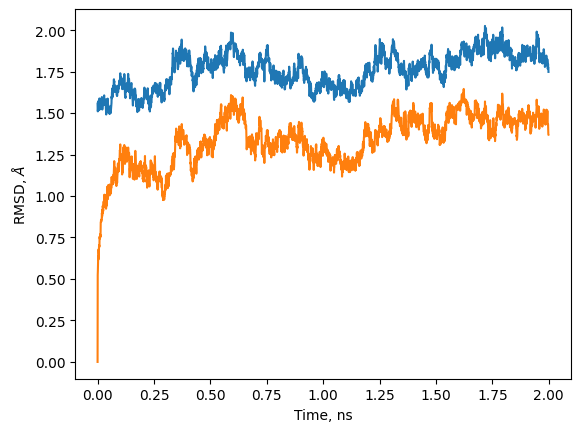

In [7]:
rmsd_ref = pt.rmsd(traj, ref=ref_coor, nofit=False, mask='@C,N,O')
rmsd_first= pt.rmsd(traj, ref=traj[0], nofit=False, mask='@C,N,O')
plt.plot(time,rmsd_ref)
plt.plot(time,rmsd_first)
plt.xlabel("Time, ns")
plt.ylabel("RMSD, $ \AA $")

### Slicing trajectories

#### Register to load frames 1 to 20

In [8]:
traj=pt.iterload('mdcrd_nowat.xtc', top='prmtop_nowat.parm7', frame_slice=[(0,20)])
print(traj)

pytraj.TrajectoryIterator, 20 frames: 
Size: 0.006859 (GB)
<Topology: 15344 atoms, 1285 residues, 390 mols, PBC with box type = orthorhombic>
           


#### Try other ways to select frames

In [9]:
print(traj[-1])    # The last frame
print(traj[0:8])   # Frames 0 to 7
print(traj[0:8:2]) # Frames 0 to 7 with stride 2
print(traj[::2])   # All frames with stride 2

<Frame with 15344 atoms>
pytraj.Trajectory, 8 frames: 
Size: 0.002744 (GB)
<Topology: 15344 atoms, 1285 residues, 390 mols, PBC with box type = orthorhombic>
           
pytraj.Trajectory, 4 frames: 
Size: 0.001372 (GB)
<Topology: 15344 atoms, 1285 residues, 390 mols, PBC with box type = orthorhombic>
           
pytraj.Trajectory, 10 frames: 
Size: 0.003430 (GB)
<Topology: 15344 atoms, 1285 residues, 390 mols, PBC with box type = orthorhombic>
           


#### Exercise
- Compute and plot RMSD of all nucleic acid atoms (residues U,A,G,C) excluding hydrogens for all frames  
- Compute and plot RMSD of all protein atoms excluding hydrogens for frames 1000-1999  
- Repeat using frome 500 as a reference  
[Atom selection syntax](https://amber-md.github.io/pytraj/latest/atom_mask_selection.html#atom-selections)